# LOADING THE DATASET

In [ ]:
#install kaggle
!pip install -q kaggle
!pip install praat-parselmouth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 31.1 MB/s eta 0:00:00


In [ ]:
! mkdir ~/.kaggle/

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
100% 426M/428M [00:02<00:00, 226MB/s]
100% 428M/428M [00:02<00:00, 219MB/s]


In [ ]:

!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import numpy as np
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Audio
from keras import utils
import parselmouth

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is loaded')

Dataset is loaded


# DATA PREPROCESSING

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,angry
1,/content/tess toronto emotional speech set dat...,angry
2,/content/tess toronto emotional speech set dat...,angry
3,/content/tess toronto emotional speech set dat...,angry
4,/content/tess toronto emotional speech set dat...,angry


In [ ]:

df['label'].value_counts()

df['label_count']= df['label'].value_counts()

df.drop('label_count', axis = 1)

,speech,label
0,/content/tess toronto emotional speech set dat...,angry
1,/content/tess toronto emotional speech set dat...,angry
2,/content/tess toronto emotional speech set dat...,angry
3,/content/tess toronto emotional speech set dat...,angry
4,/content/tess toronto emotional speech set dat...,angry
...,...,...
2795,/content/tess toronto emotional speech set dat...,angry
2796,/content/tess toronto emotional speech set dat...,angry
2797,/content/tess toronto emotional speech set dat...,angry
2798,/content/tess toronto emotional speech set dat...,angry


In [ ]:
df['label'].value_counts()

,count
label,
angry,400
sad,400
ps,400
happy,400
fear,400
neutral,400
disgust,400


<Axes: xlabel='label', ylabel='count'>

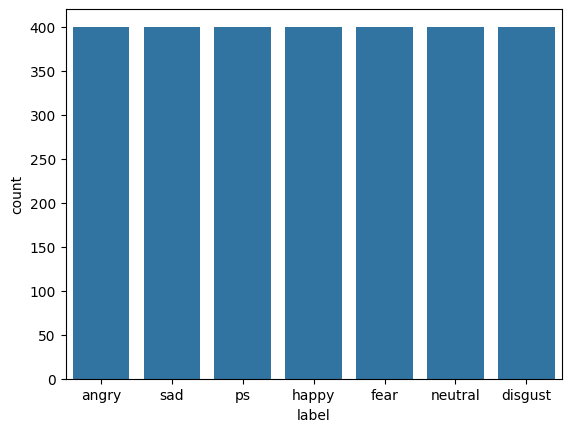

In [ ]:
sns.countplot(data = df, x = 'label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

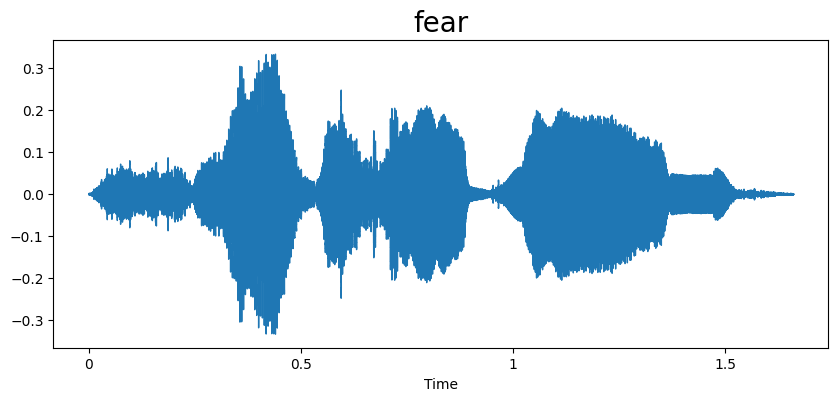

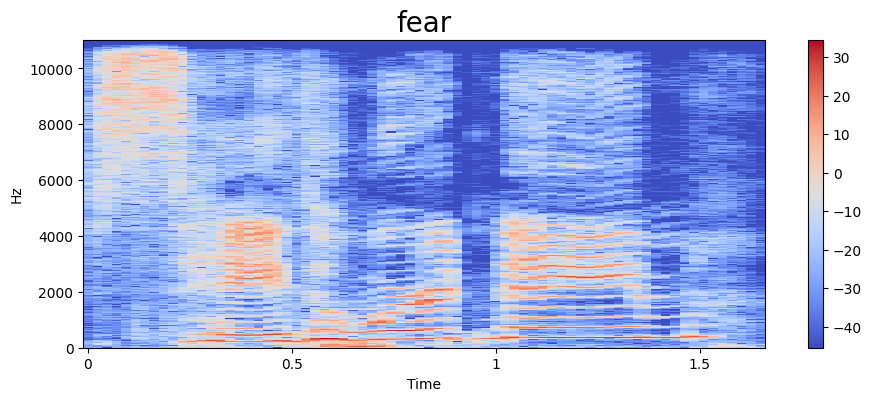

In [ ]:
emotion = "fear"
path = np.array(df['speech'][df['label']==emotion])[18]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

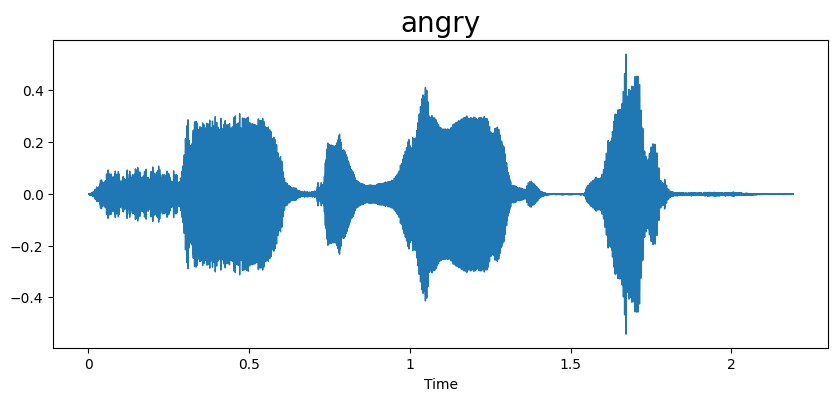

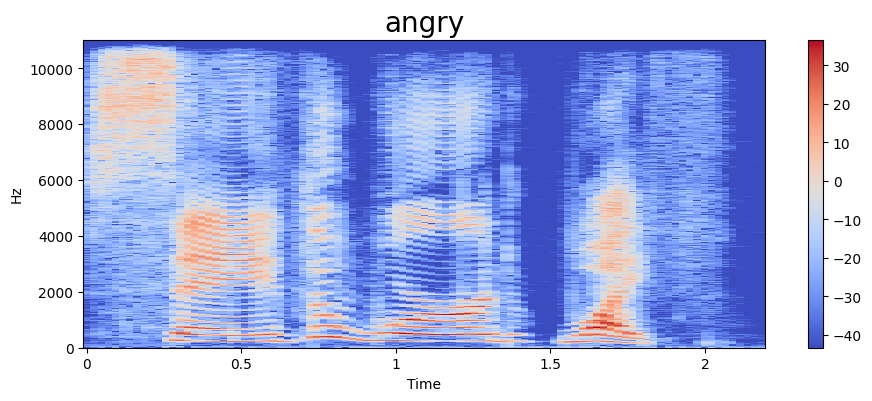

In [ ]:
emotion = "angry"
path = np.array(df['speech'][df['label']==emotion])[18]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

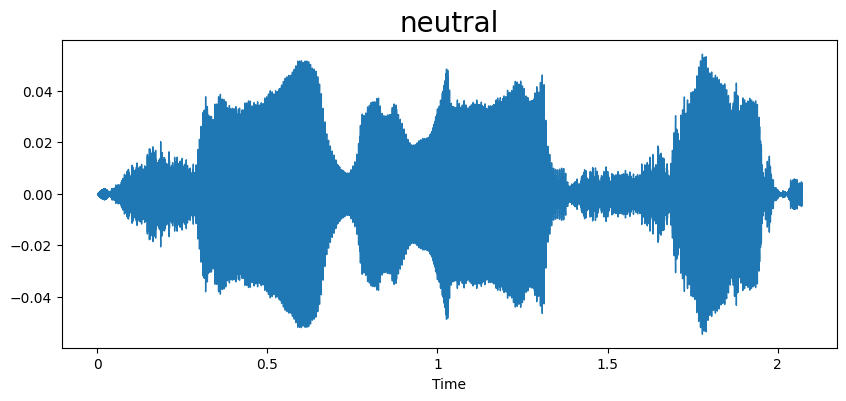

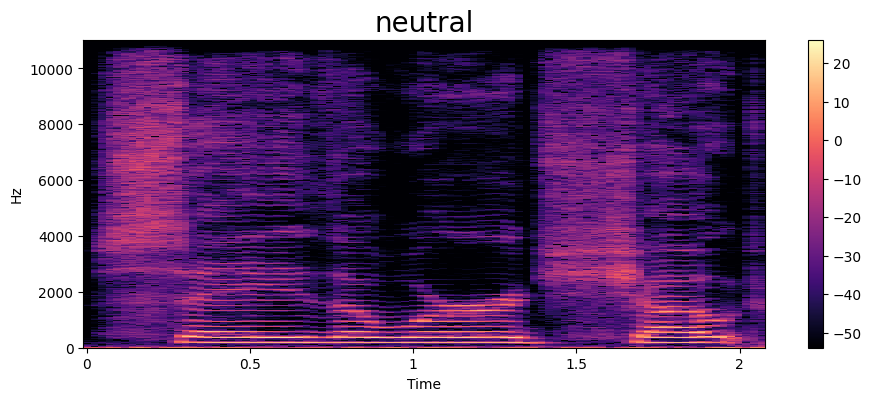

In [ ]:
emotion = "neutral"
path = np.array(df['speech'][df['label']==emotion])[18]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

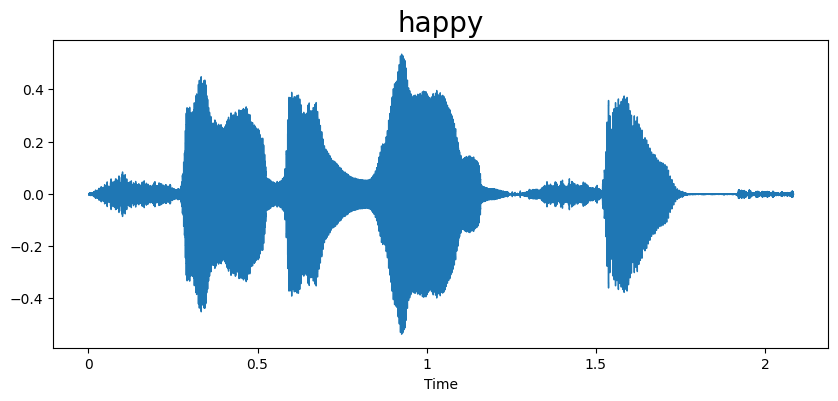

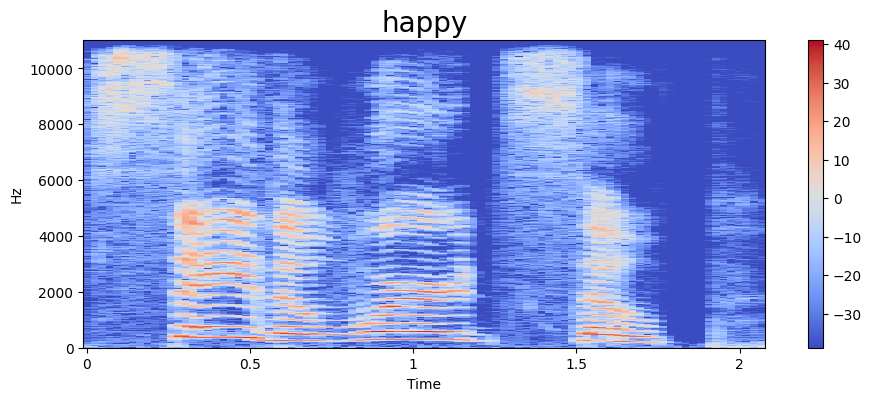

In [ ]:
emotion = "happy"
path = np.array(df['speech'][df['label']==emotion])[18]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

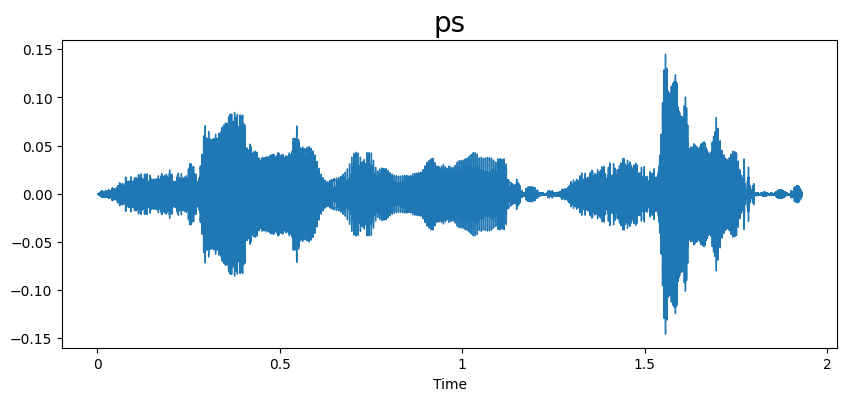

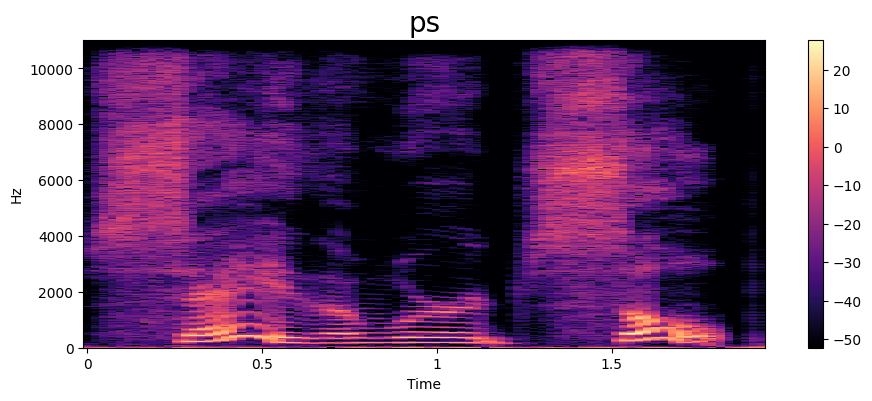

In [ ]:
emotion = "ps"
path = np.array(df['speech'][df['label']==emotion])[18]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

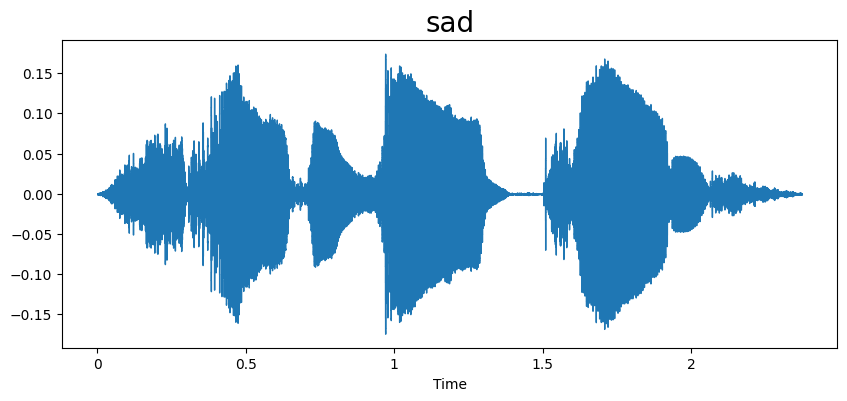

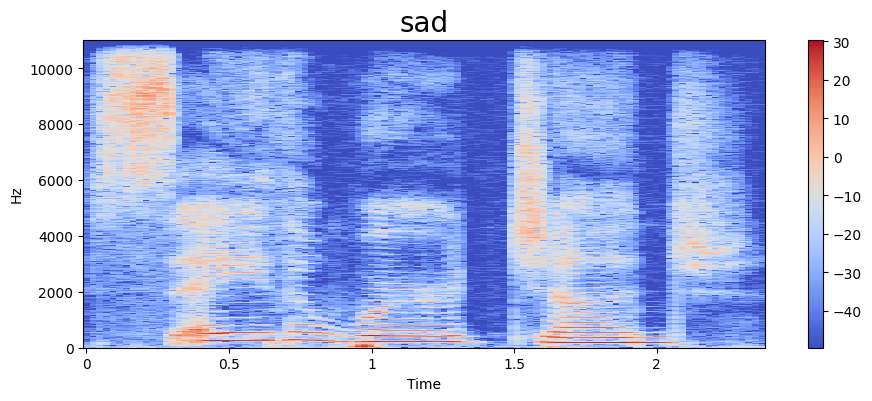

In [ ]:
emotion = "sad"
path = np.array(df['speech'][df['label']==emotion])[18]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# FEATURE EXTRACTION

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
  return mfcc

In [ ]:
extract_mfcc(df['speech'][18])

array([-3.5627823e+02,  5.3119846e+01, -4.4199357e+00,  1.0997326e+01,
       -2.4281992e+01,  1.6048146e+00, -2.1077719e+00, -1.6254442e+01,
       -5.7773347e+00, -6.4798775e+00, -1.3884912e+01,  3.8132579e+00,
       -1.2483077e+01,  6.4243813e+00, -7.1535830e+00, -2.3253677e+00,
       -6.8455297e-01,  3.3873789e+00, -3.6236229e+00,  1.0928441e+00,
       -6.7246056e+00, -3.7011063e+00, -8.9586411e+00, -3.5260882e+00,
       -3.0713503e+00,  4.0459199e+00,  8.3210106e+00,  1.4264095e+01,
        1.7395853e+01,  1.8309294e+01,  8.5414448e+00,  3.2362728e+00,
        2.7440336e-01,  5.0354304e+00,  4.3246932e+00,  5.0304575e+00,
        1.5334474e+00, -1.2123408e-01, -1.3232021e+00,  3.6725874e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-379.06485, 53.400295, 0.9792953, 20.58792, -..."
1,"[-354.5197, 23.32365, 4.0444465, 9.787825, -12..."
2,"[-370.97238, 50.325123, -3.4964592, 21.81727, ..."
3,"[-350.50232, 62.35611, -5.173286, 21.805725, -..."
4,"[-318.4119, 31.05064, -2.8924272, 21.296824, -..."
...,...
2795,"[-414.5506, 107.41901, 6.632282, -19.008053, -..."
2796,"[-416.0307, 49.28708, -1.749876, -9.981473, -1..."
2797,"[-411.36368, 78.03248, -3.1974425, -10.476555,..."
2798,"[-415.30466, 81.50611, -5.9010625, -1.1653156,..."


In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

# PREPARING THE LSTM MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape = (40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os

audio_dir = '/content/TESS Toronto emotional speech set data'

if os.path.exists(audio_dir):
    files = os.listdir(audio_dir)
    print(f"Files in directory: {files}")
else:
    print("Audio directory does not exist.")

Files in directory: ['YAF_angry', 'YAF_sad', 'OAF_Pleasant_surprise', 'OAF_Sad', 'YAF_pleasant_surprised', 'YAF_happy', 'OAF_happy', 'YAF_fear', 'OAF_neutral', 'YAF_disgust', 'YAF_neutral', 'OAF_disgust', 'OAF_Fear', 'OAF_angry']


In [ ]:
import numpy as np

X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [ ]:
history = model.fit(X_train, y_train, validation_data = [X_val, y_val], epochs = 30, batch_size = 64)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - acc: 0.2002 - loss: 1.8500 - val_acc: 0.4558 - val_loss: 1.5261
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - acc: 0.4889 - loss: 1.4227 - val_acc: 0.6854 - val_loss: 0.8554
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - acc: 0.6444 - loss: 0.9058 - val_acc: 0.8588 - val_loss: 0.5015
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - acc: 0.8003 - loss: 0.5599 - val_acc: 0.8844 - val_loss: 0.3341
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - acc: 0.8720 - loss: 0.3751 - val_acc: 0.8741 - val_loss: 0.3561
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - acc: 0.8990 - loss: 0.2944 - val_acc: 0.9371 - val_loss: 0.1804
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - acc: 0.9398 - loss: 0.2024 - val_acc: 0.9643 - val_loss: 0.1273
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - acc: 0.9553 - loss: 0.1557 - val_acc: 0.9286 - val_loss: 0.2022
Epoch 9/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - acc: 0.9

# PLOTTING THE RESULTS

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
# epochs = range(1, len(acc) + 1)

In [ ]:
epochs = epochs[:len(acc)]


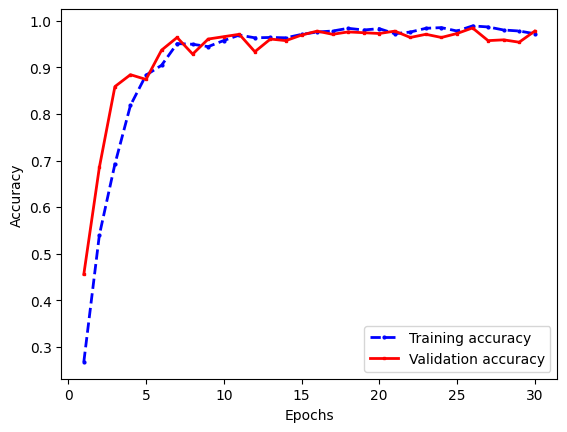

In [ ]:
epochs = list(range(1,31))
plt.plot(epochs, acc, 'bo--', label='Training accuracy', linewidth=2, markersize=2)
plt.plot(epochs, val_acc, 'rs-', label='Validation accuracy', linewidth=2, markersize=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

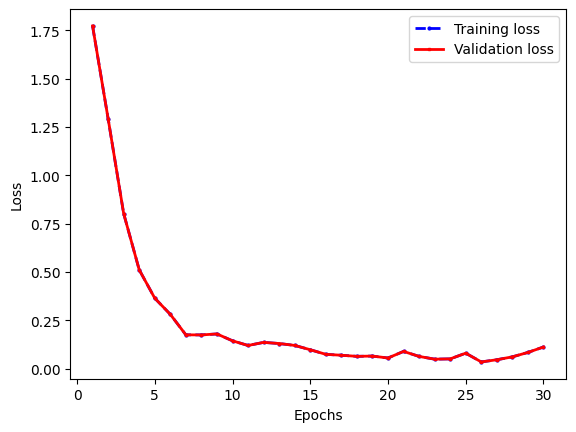

In [ ]:
loss = history.history['loss']
plt.plot(epochs, loss, 'bo--', label='Training loss', linewidth = 2, markersize = 2)
plt.plot(epochs, loss, 'rs-', label='Validation loss',linewidth = 2, markersize = 2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()